In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open a file upload dialog


Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv


In [ ]:
import pandas as pd

matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

print(matches_df.head())  # Display first few rows


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [ ]:
import pandas as pd

# Load the datasets
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

# Display basic info
print("Matches Dataset:")
print(matches_df.info())
print(matches_df.head())

print("\nDeliveries Dataset:")
print(deliveries_df.info())
print(deliveries_df.head())


Matches Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 1

In [ ]:
matches_df = matches_df.drop(columns=["method", "umpire1", "umpire2", "super_over"], errors='ignore')
deliveries_df = deliveries_df.drop(columns=["extras_type", "fielder"], errors='ignore')


In [ ]:
# Drop rows where winner is missing
matches_df = matches_df.dropna(subset=["winner"])


Most Successful Teams

<ipython-input-9-852e622d260a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")


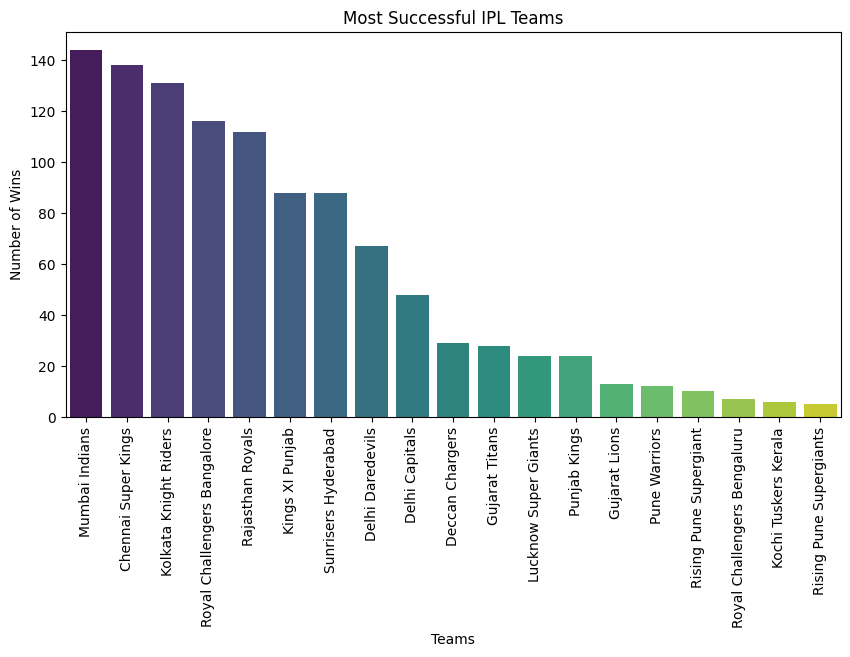

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

team_wins = matches_df["winner"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Most Successful IPL Teams")
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.show()


Toss Impact on Match Wins

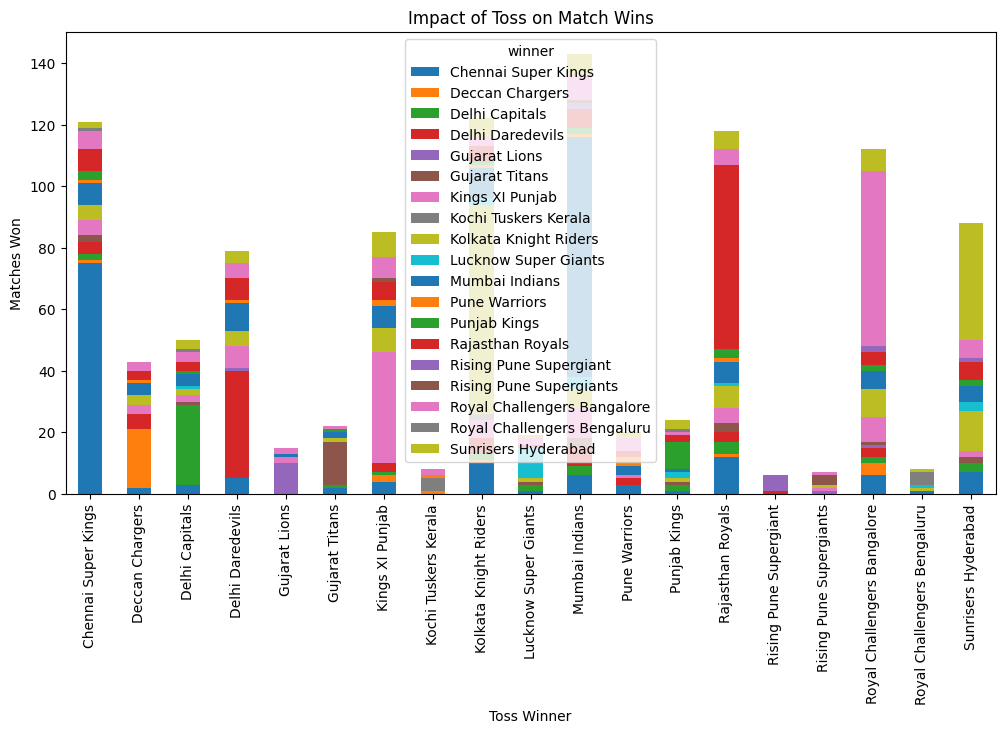

In [ ]:
toss_win = matches_df.groupby(["toss_winner", "winner"]).size().unstack()

toss_win.plot(kind="bar", figsize=(12,6), stacked=True)
plt.title("Impact of Toss on Match Wins")
plt.xlabel("Toss Winner")
plt.ylabel("Matches Won")
plt.xticks(rotation=90)
plt.show()


Top Run Scorers

<ipython-input-11-024863f8a3bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette="coolwarm")


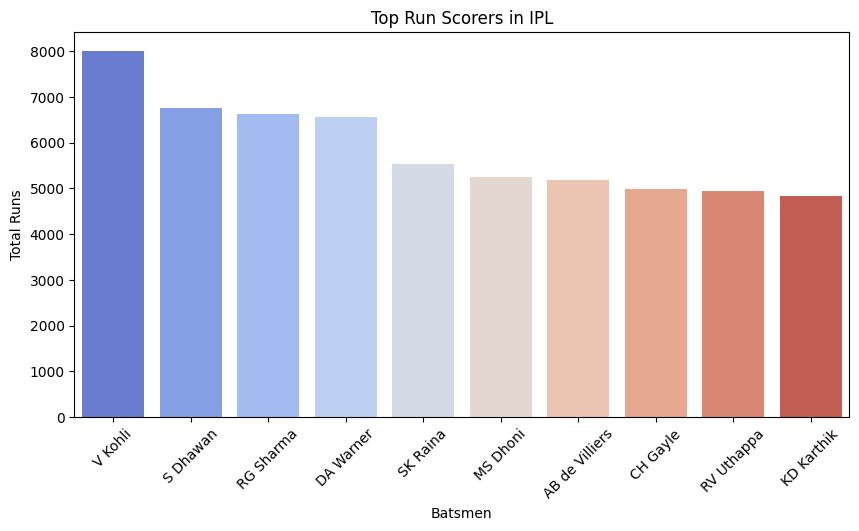

In [ ]:
top_batsmen = deliveries_df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top Run Scorers in IPL")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.show()


Win Percentage by Batting First vs. Chasing

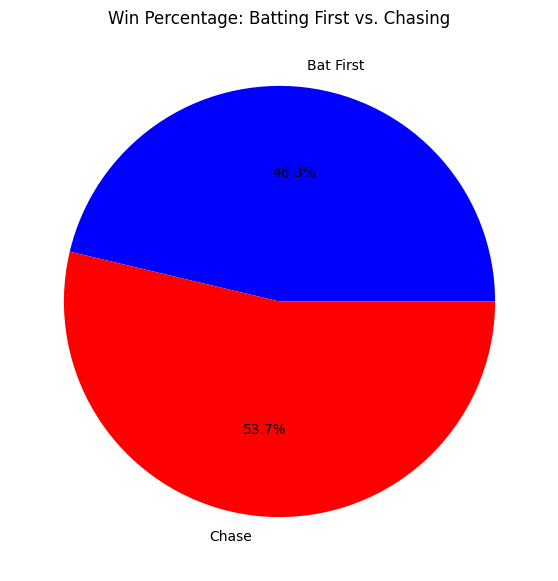

In [ ]:
# Count matches won by batting first and second
batting_first_wins = matches_df[matches_df["result"] == "runs"].shape[0]
chasing_wins = matches_df[matches_df["result"] == "wickets"].shape[0]

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie([batting_first_wins, chasing_wins], labels=["Bat First", "Chase"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Win Percentage: Batting First vs. Chasing")
plt.show()


Most Player of the Match Awards

<ipython-input-14-b14f91c1329e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y=top_players.values, palette="viridis")


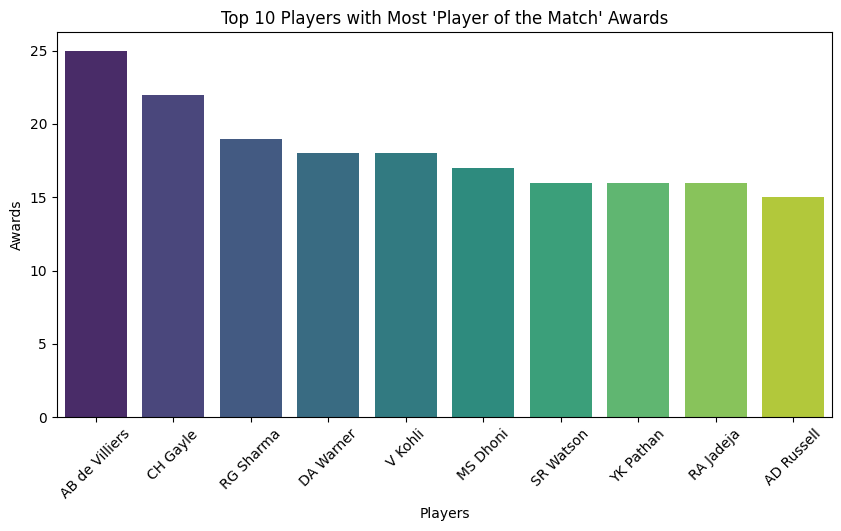

In [ ]:
# Count number of awards per player
top_players = matches_df["player_of_match"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_players.index, y=top_players.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.xlabel("Players")
plt.ylabel("Awards")
plt.show()


Best Bowlers (Most Wickets)

<ipython-input-15-d66469465682>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="coolwarm")


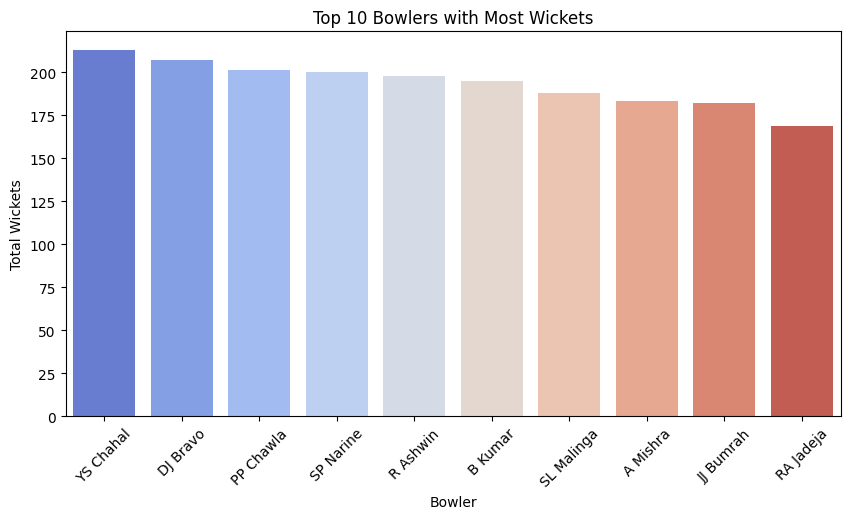

In [ ]:
# Count total wickets by each bowler
top_bowlers = deliveries_df[deliveries_df["is_wicket"] == 1]["bowler"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Bowlers with Most Wickets")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.show()


Venue Analysis: Which Stadium Favors Batting/Bowling?

<ipython-input-16-3ffd1b682068>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_wins.index, y=venue_wins.values, palette="magma")


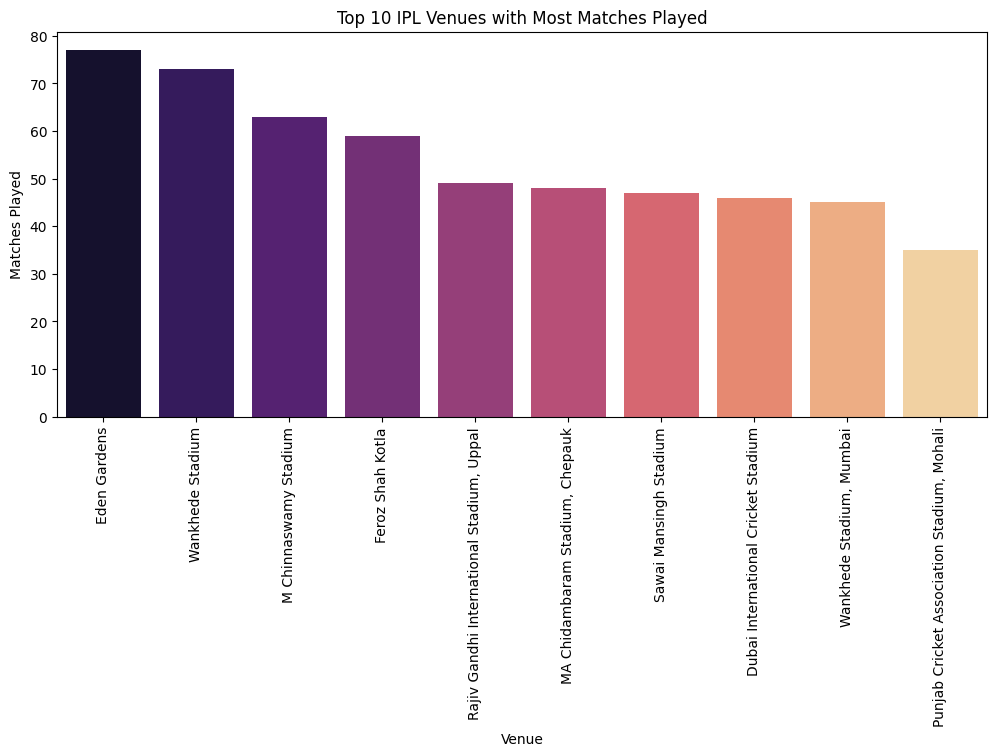

In [ ]:
# Count wins per venue
venue_wins = matches_df["venue"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=venue_wins.index, y=venue_wins.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Top 10 IPL Venues with Most Matches Played")
plt.xlabel("Venue")
plt.ylabel("Matches Played")
plt.show()


Most Six-Hitting Players

<ipython-input-17-fcb0fcd5f0d0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_six_hitters.index, y=top_six_hitters.values, palette="plasma")


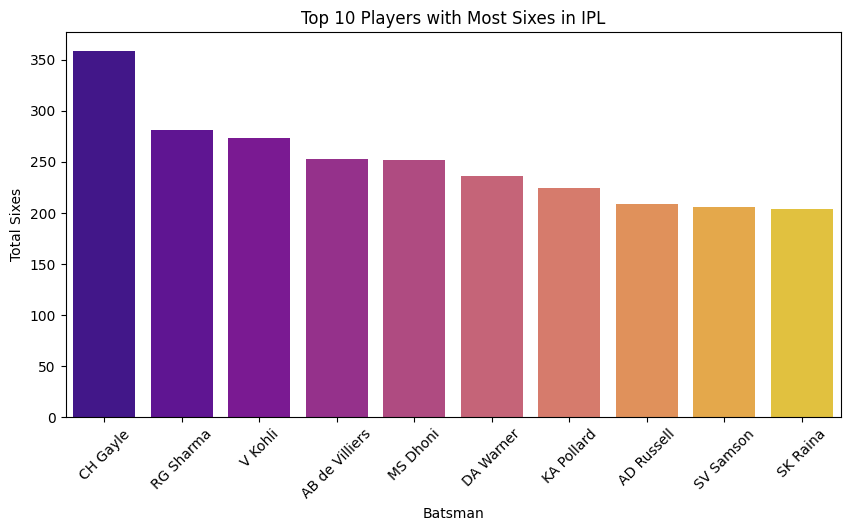

In [ ]:
# Filter for only sixes
sixes_df = deliveries_df[deliveries_df["batsman_runs"] == 6]

# Count total sixes by each batsman
top_six_hitters = sixes_df["batter"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_six_hitters.index, y=top_six_hitters.values, palette="plasma")
plt.xticks(rotation=45)
plt.title("Top 10 Players with Most Sixes in IPL")
plt.xlabel("Batsman")
plt.ylabel("Total Sixes")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open a file upload dialog


Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv


In [ ]:
import pandas as pd

matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

print(matches_df.head())  # Check if data is loaded


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [ ]:
matches_df.to_csv("Cleaned_Matches.csv", index=False)
deliveries_df.to_csv("Cleaned_Deliveries.csv", index=False)


In [ ]:
from google.colab import files

# Download Cleaned Matches File
files.download("Cleaned_Matches.csv")

# Download Cleaned Deliveries File
files.download("Cleaned_Deliveries.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>